## Advanced Econometrics 2 (2020/2021) - Bootstrap Methods

Computer Class 1a (Monday)

*Aim of this computer class*: to gain practical experience of the
Jackknife and Bootstrap in the simple case of i.i.d. data.

Assume that $X_{i}$ is randomly sampled from the exponential distribution with parameter 1, i.e. 
$$P[X_{i}\leq x]=\left\{ \begin{array}{ll} 1-e^{-x}, & x\geq 0 \\ 
0, & x<0.%
\end{array}%
\right.$$
The density function equals $f(x)=e^{-x}$ for $x\geq 0$ and 0 otherwise. For the exponential distribution with parameter $\lambda$, we have $\mathbb{E}[X_{i}]=\lambda$ and $\mathbb{V}[X_{i}]=\lambda ^{2}$ (this definition can differ from what you have learned), so in this case we have $\mathbb{E}[X_{i}]=1$ and $\mathbb{V}[X_{i}]=1$.
Suppose we are interest in estimating $\mu$, $\mu ^{2}$ and $\mu ^{3}$ using the naive estimators $\bar{X}$, $\bar{X}^{2}$ and $\bar{X}^{3}$. We know from theory, that $\bar{X}$ is an unbiased estimator of $\mu$,
but this does not hold for $\bar{X}^{2}$ (and $\bar{X}^{3})$ with respect to $\mu ^{2}$ (and $\mu ^{3}$).

## Assignment

1.  Download the file ‘Excel\_Jackknife.xlsx’ from Canvas and save it in
    your AE2 subdirectory (create this directory first). Open the
    file.

2.  Column $B$ contains 10 observations $\{x_{1},...,x_{10}\}$. In rows
    14-16, you see the estimates $\bar{x}$, $\bar{x}^{2}$ and
    $\bar{x}^{3}$. Calculate the $N$ jackknife values
    $\hat{\theta}_{(-i)}$ for $i=1,...,10$. Row 14 should contain the
    values for $\hat{\theta}=\bar{X}$, while the two rows below should
    contain the values for $\hat{\theta}=\bar{X}^{2}$ and $%
    \hat{\theta}=\bar{X}^{3}$. You can use the selection indices in
    columns $D$-$%
    M$.

3.  Determine the jackknife estimate of the bias of $\hat{\theta}$ in
    column $Q$:
    $$(N-1)(\bar{\theta}_{(-1)}-\hat{\theta}), \ \ \ \ \ \ \ \text{with}\bar{%
    \theta}_{(-1)}=N^{-1}\sum \hat{\theta}_{(-i)}$$ and the
    bias-corrected jackknife estimate of $\theta$ in column $S:$
    $$\hat{\theta}_{Jack}^{BC}=N\hat{\theta}-(N-1)\bar{\theta}_{(-1)}.$$

4.  Determine the jackknife estimate of the standard error of estimator
    $\hat{\theta}$ in column $V$:
    $$SE_{Jack}[\hat{\theta}]=\sqrt{\frac{N-1}{N}\sum (\hat{\theta}_{(-i)}-\bar{%
    \theta}_{(-1)})^{2}}.$$ Using these standard errors, you can
    calculate the $t$-statistics
    $$T=\frac{\hat{\theta}-\theta _{0}}{SE_{Jack}[\hat{\theta}]}$$ for
    testing $H_{0}^{1}:\mu =1$, $H_{0}^{2}:\mu ^{2}=1$ and
    $H_{0}^{3}:\mu
    ^{3}=1$. Also calculate the test statistics using the bias-corrected
    jackknife estimate $\hat{\theta}_{Jack}^{BC}$, i.e.
    $$T^{BC}=\frac{\hat{\theta}_{Jack}^{BC}-\theta _{0}}{SE_{Jack}[\hat{\theta}]}.$$

5.  You can check your results using the next code.

In [1]:
import numpy as np
np.random.seed(142857)
x=np.array([0.01735423, 0.031117747, 0.338455167, 1.689662823, 3.392061009, 0.410903576, 0.478754693, 3.571679284, 0.63655284, 0.433513319])
N=x.shape[0]
jackknife_values=np.zeros((N,3))
for j in range(N):
    for i in range(3):
        jackknife_values[j,i]=np.mean(np.delete(x,j))**(i+1)
for i in range(3):
    theta_hat      =np.mean(x)**(i+1)
    theta_jack__ave=np.mean(jackknife_values[:,i])
    bias_jack      =(N-1)*(theta_jack__ave-theta_hat)
    theta_hat_BC   =N*theta_hat-(N-1)*theta_jack__ave
    SE_jack        =np.sqrt((N-1)/N*np.sum((jackknife_values[:,i]-theta_jack__ave)**2))
    t_uncor        =(theta_hat-1)/SE_jack
    t_cor          =(theta_hat_BC-1)/SE_jack
    print('Average^%d: Jackknife bias=%7.4f     Bias-cor=%7.4f     SE_Jack=%7.4f   t(uncor)=%7.4f   t(cor)=%7.4f' 
         % (i+1,bias_jack,theta_hat_BC,SE_jack,t_uncor,t_cor) )

Average^1: Jackknife bias= 0.0000     Bias-cor= 1.1000     SE_Jack= 0.4233   t(uncor)= 0.2363   t(cor)= 0.2363
Average^2: Jackknife bias= 0.1792     Bias-cor= 1.0308     SE_Jack= 0.8635   t(uncor)= 0.2432   t(cor)= 0.0357
Average^3: Jackknife bias= 0.5623     Bias-cor= 0.7687     SE_Jack= 1.3373   t(uncor)= 0.2475   t(cor)=-0.1729


 6.  Execute the code in the next cell. The vectors `ave1B`/`ave2B`/`ave3B` contain 100,000 bootstrap
    replications of $\bar{X}^{\ast }$ / $\bar{X}^{\ast 2}$ / $\bar{X}%
    ^{\ast 3}$.

In [2]:
REP=100000
ave1B=np.zeros(REP)
ave2B=np.zeros(REP)
ave3B=np.zeros(REP)
for b in range(REP):
    index=np.random.randint(N,size=N)
    xB=np.copy(x[index])
    ave1B[b]=np.mean(xB)
    ave2B[b]=np.mean(xB)**2
    ave3B[b]=np.mean(xB)**3

(array([1.8930e+03, 1.0638e+04, 2.3130e+04, 2.7762e+04, 2.1080e+04,
        1.0744e+04, 3.6800e+03, 9.0900e+02, 1.4500e+02, 1.9000e+01]),
 array([0.06359092, 0.35426644, 0.64494196, 0.93561747, 1.22629299,
        1.51696851, 1.80764402, 2.09831954, 2.38899506, 2.67967057,
        2.97034609]),
 <BarContainer object of 10 artists>)

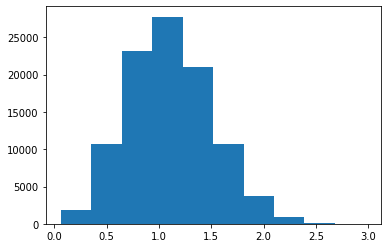

In [3]:
import matplotlib.pyplot as plt
plt.hist(ave1B)

7.  Take a look at the histogram of the vector `ave1B`. This is the (simulated) bootstrap
    distribution of $\bar{X}%
    ^{\ast }$. The mean of $\bar{X}^{\ast }$, i.e.
    $\mathbb{E}[\bar{X}^{\ast }|%
    \hat{F}]$, is estimated by the sample average of the 100,000
    bootstrap replications, i.e.
    $$\mathbb{E}[\bar{X}^{\ast }|\hat{F}]\approx \frac{1}{B}\sum_{b=1}^{B}\bar{X}%
    _{b}(=\text{np.mean in Numpy}).$$ Determine the bootstrap
    estimate of the bias of $\hat{\theta}:$
    $$\mathbb{E}[\bar{X}^{\ast }|\hat{F}]-\hat{\theta},$$ and calculate
    the (approximate) bias-corrected bootstrap estimate of $\theta
    :$
    $$\hat{\theta}_{Boot}^{BC}=2\hat{\theta}-\mathbb{E}[\bar{X}^{\ast }|\hat{F}].$$
    Repeat the calulation for the vectors `ave2B` and `ave3B`.


In [ ]:
import plotly.express as px
px.histogram(x=ave1B,nbins=150,labels={'x':'ave1B'})  # make histogram

In [26]:
theta1Hat=np.mean(x)    # estimate for mu based on original sample
bias1=np.mean(ave1B) - theta1Hat                  # estimated bias based on bootstrap histogram
theta1HatBC=theta1Hat - bias1            # bias-corrected (BC) estimate
# now for ave2B
theta2Hat=np.mean(x)**2
bias2=np.mean(ave2B) - theta2Hat
theta2HatBC=theta2Hat - bias2
# now for ave3B
theta3Hat=np.mean(x)**3
bias3=np.mean(ave3B) - theta3Hat
theta3HatBC=theta3Hat - bias3

8.  The variance of $\bar{X}^{\ast }$, i.e.
    $\mathbb{V}[\bar{X}^{\ast }|%
    \hat{F}]$ is approximated by
    $$\mathbb{V}[\bar{X}^{\ast }|\hat{F}]\approx \frac{1}{B-1}\sum%
    \nolimits_{b=1}^{B}(\bar{X}_{b}^{\ast }-\bar{X}_{mean}^{\ast })^{2}(=\text{np.var in Nump}).$$
    Hence, $$SE_{Boot}[\hat{\theta}]=\sqrt{\mathbb{V}[\bar{X}^{\ast }|\hat{F}]}(= 
    \text{np.std in Numpy}).$$ Calculate the $t$-statistics
    $$T=\frac{\hat{\theta}-\theta _{0}}{SE_{Boot}[\hat{\theta}]}$$ for
    testing $H_{0}^{1}:\mu =1$, $H_{0}^{2}:\mu ^{2}=1$ and
    $H_{0}^{3}:\mu
    ^{3}=1$. Also calculate the test statistics using the bias-corrected
    bootstrap estimate $\hat{\theta}_{Boot}^{BC}$.

In [27]:
SEtheta1Hat=np.std(ave1B)            # standard error (SE_boot) based on bootstrap histogram
T1  =(theta1Hat - 1)/SEtheta1Hat                   # t-ratio based on theta1Hat and SE_boot
T1BC=(theta1HatBC - 1)/SEtheta1Hat                   # t-ratio based on theta1HatBC and SE_boot
# now for T2
SEtheta2Hat=np.std(ave2B)
T2  =(theta2Hat - 1)/SEtheta2Hat
T2BC=(theta2HatBC - 1)/SEtheta2Hat    
# now for T3
SEtheta3Hat=np.std(ave3B)
T3  =(theta3Hat - 1)/SEtheta3Hat
T3BC=(theta3HatBC - 1)/SEtheta3Hat

In [28]:
SEtheta1Hat

0.39984944505919634

9.  A Jupyter notebook to check your bootstrap results can be downloaded
    from Canvas.